In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

HR_mem (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
E, x, y = 0..30, 0..1, 0..1
box = E × x × y
using CairoMakie, GLMakie

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), abstol = 1e-14, reltol = 1e-14)

(alg = Vern9(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true), abstol = 1.0e-14, reltol = 1.0e-14)

In [86]:
I0 = -1.65; U0 = 0.265;
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.254587677389917, 0.7099299111721875, 0.549798431121074]
println("last point trajectory:$u0")

last point trajectory:[8.254587677389917, 0.7099299111721875, 0.549798431121074]


In [87]:
ds = CoupledODEs(TM, u0, p)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.265, 0.305, 0.3, -1.65]
 time:          0.0
 state:         [8.254587677389917, 0.7099299111721875, 0.549798431121074]


In [88]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);
Jac = jacob_TM_(fp[1], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-11 + fp[1]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.416903922396365
 0.73810011806806
 0.43637206145854623

In [89]:
prob = ODEProblem(TM, shift, [0.0, 1000.0], p)
sol = solve(prob, alg = Vern9(), abstol = 1e-14, reltol = 1e-14)

retcode: Success
Interpolation: specialized 9th order lazy interpolation
t: 128768-element Vector{Float64}:
    0.0
    0.15896638524887347
    0.2546638836613023
    0.33532280021475563
    0.4158926515521853
    0.49302664759293424
    0.5654393878098652
    0.6469203837057084
    0.716148050132507
    0.7809447219948275
    ⋮
  999.9547793627353
  999.9600863871364
  999.9662088711619
  999.9721781192218
  999.9785303584601
  999.9842977564715
  999.9912646447715
  999.9972009947555
 1000.0
u: 128768-element Vector{SVector{3, Float64}}:
 [8.416903922396365, 0.73810011806806, 0.43637206145854623]
 [8.416903922389878, 0.7381001180683899, 0.43637206145846896]
 [8.416903922388217, 0.7381001180684731, 0.4363720614584495]
 [8.416903922387446, 0.7381001180685124, 0.4363720614584404]
 [8.416903922387023, 0.7381001180685349, 0.4363720614584351]
 [8.416903922386782, 0.7381001180685474, 0.43637206145843205]
 [8.416903922386627, 0.7381001180685547, 0.43637206145843027]
 [8.416903922386481, 0.73

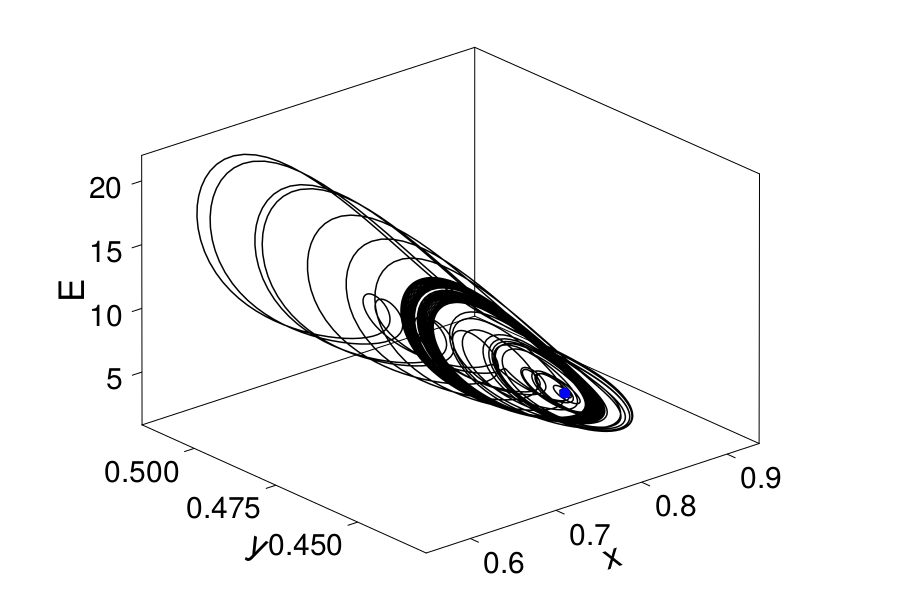

CairoMakie.Screen{IMAGE}


In [91]:
ts, tf = 1, 10000
indexx,indexy,indexz = 2, 3, 1
lb_size = 35; tck_size = 30;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(axis3, sol[indexx, ts:tf], sol[indexy, ts:tf], sol[indexz, ts:tf], linewidth = 1.5, color = :black)

scatter!(fp[1][indexx], fp[1][indexy], fp[1][indexz], color = :blue, markersize = 15.0)
display(f)